# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

## Краткое ТЗ:

- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:  
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);  
    - Разбивка событий по темам источников;  
    - Таблица соответствия тем источников темам карточек;  
- По каким параметрам данные должны группироваться:  
    - Дата и время;  
    - Тема карточки;  
    - Тема источника;  
    - Возрастная группа;  
- Характер данных:  
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;  
    - Разбивка событий по темам источников — относительные величины (% событий);  
    - Соответствия тем источников темам карточек - абсолютные величины;  
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

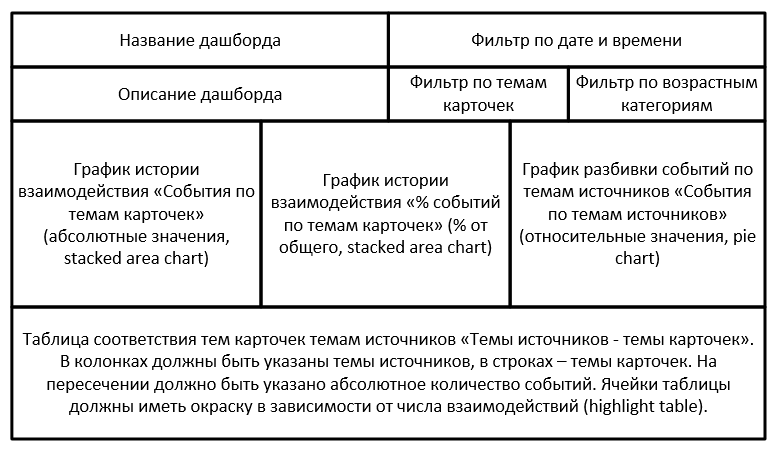

### Запрос к базе данных

#### Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#### Подключение к базе данных:

In [2]:
db_config = {'user': 'praktikum_student',
            'pwd': 'Sdf4$2;d-d30pp',
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432,
            'db': 'data-analyst-zen-project-db'}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [3]:
query = '''SELECT *
           FROM dash_visits
'''

In [4]:
data = pd.io.sql.read_sql(query, con = engine)
data.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


### Предобработка данных

***Изучим исходные данные в таблице и основную информацию, проверим данные на наличие пропусков и дубликатов:***

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


***Пропусков в таблице нет, столбцы имеют нужный тип данных. Посмотрим на дубликаты:***

In [6]:
print('Количество явных строк-дубликатов:', data.duplicated().sum())

Количество явных строк-дубликатов: 0


***Посмотрим данные по столбцам:***

In [7]:
print(data['dt'].unique())
print()
print(data['item_topic'].unique())
print()
print(data['age_segment'].unique())
print()
print(data['source_topic'].unique())

['2019-09-24T18:32:00.000000000' '2019-09-24T18:35:00.000000000'
 '2019-09-24T18:54:00.000000000' '2019-09-24T18:55:00.000000000'
 '2019-09-24T18:56:00.000000000' '2019-09-24T18:57:00.000000000'
 '2019-09-24T18:58:00.000000000' '2019-09-24T18:59:00.000000000'
 '2019-09-24T19:00:00.000000000' '2019-09-24T18:29:00.000000000'
 '2019-09-24T18:30:00.000000000' '2019-09-24T18:31:00.000000000'
 '2019-09-24T18:52:00.000000000' '2019-09-24T18:33:00.000000000'
 '2019-09-24T18:53:00.000000000' '2019-09-24T18:28:00.000000000'
 '2019-09-24T18:34:00.000000000']

['Деньги' 'Дети' 'Женская психология' 'Женщины' 'Здоровье' 'Знаменитости'
 'Интересные факты' 'Искусство' 'История' 'Красота' 'Культура' 'Наука'
 'Общество' 'Отношения' 'Подборки' 'Полезные советы' 'Психология'
 'Путешествия' 'Рассказы' 'Россия' 'Семья' 'Скандалы' 'Туризм' 'Шоу'
 'Юмор']

['18-25' '26-30' '31-35' '36-40' '41-45' '45+']

['Авто' 'Деньги' 'Дети' 'Еда' 'Здоровье' 'Знаменитости' 'Интерьеры'
 'Искусство' 'История' 'Кино' 'Музыка'

In [8]:
data['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

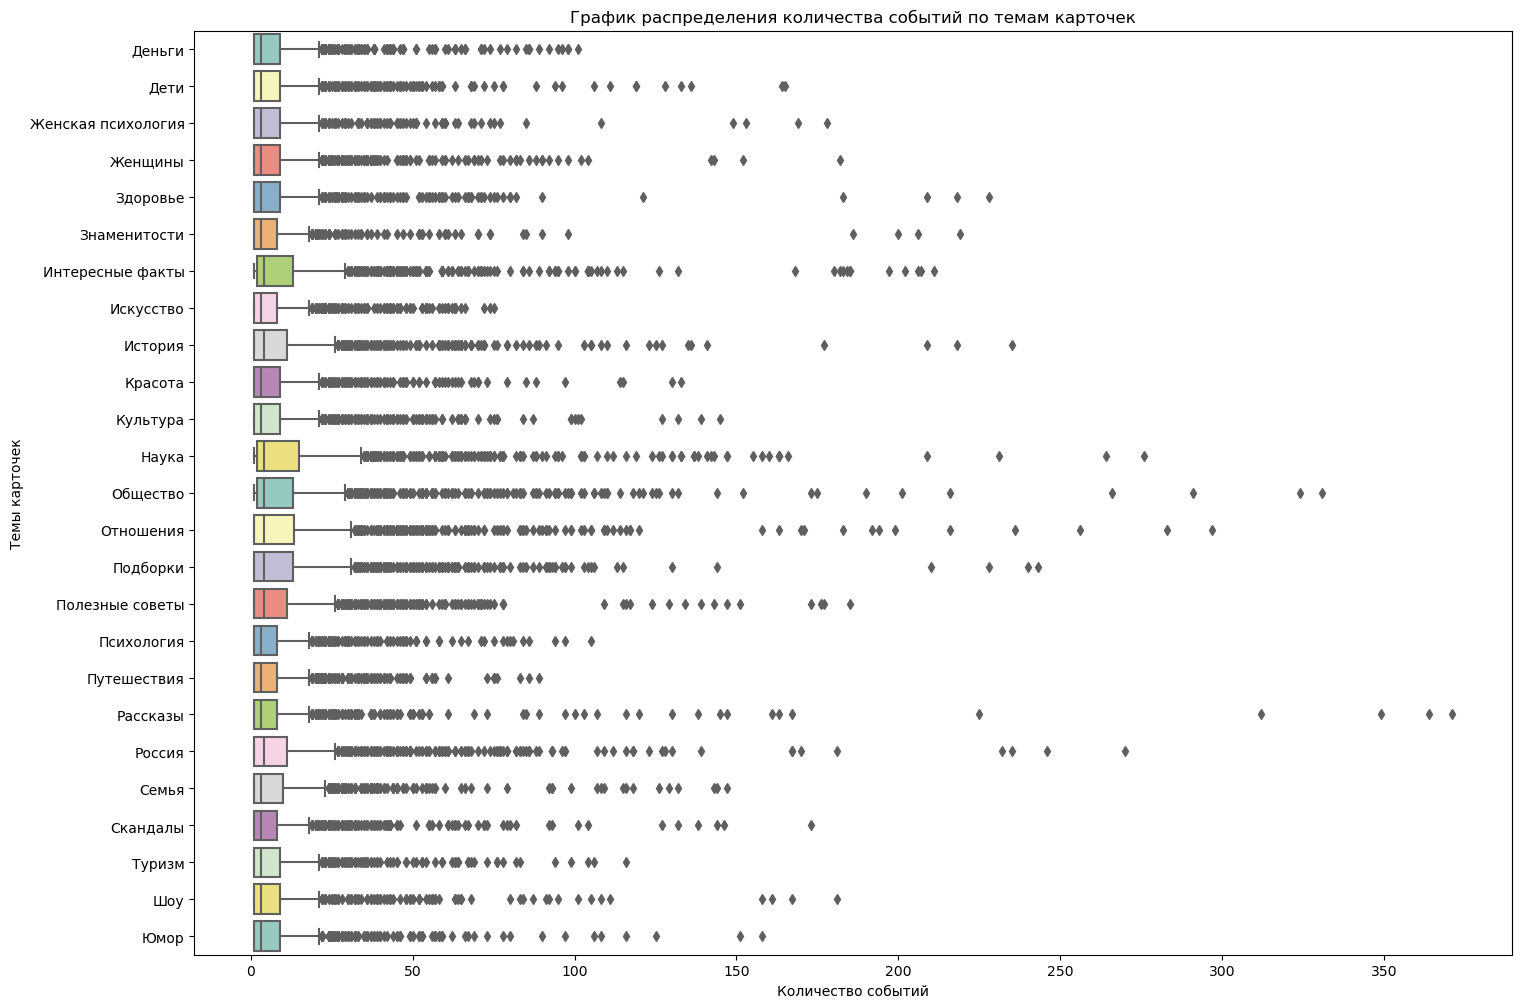

In [9]:
plt.figure(figsize=(17, 12))
ax = sns.boxplot(data=data, x='visits', y='item_topic', palette="Set3")

plt.title('График распределения количества событий по темам карточек')
plt.xlabel('Количество событий')
plt.ylabel('Темы карточек')
plt.show()

***Необходимо ввести параметры, чтобы график был более понятным для восприятия:***

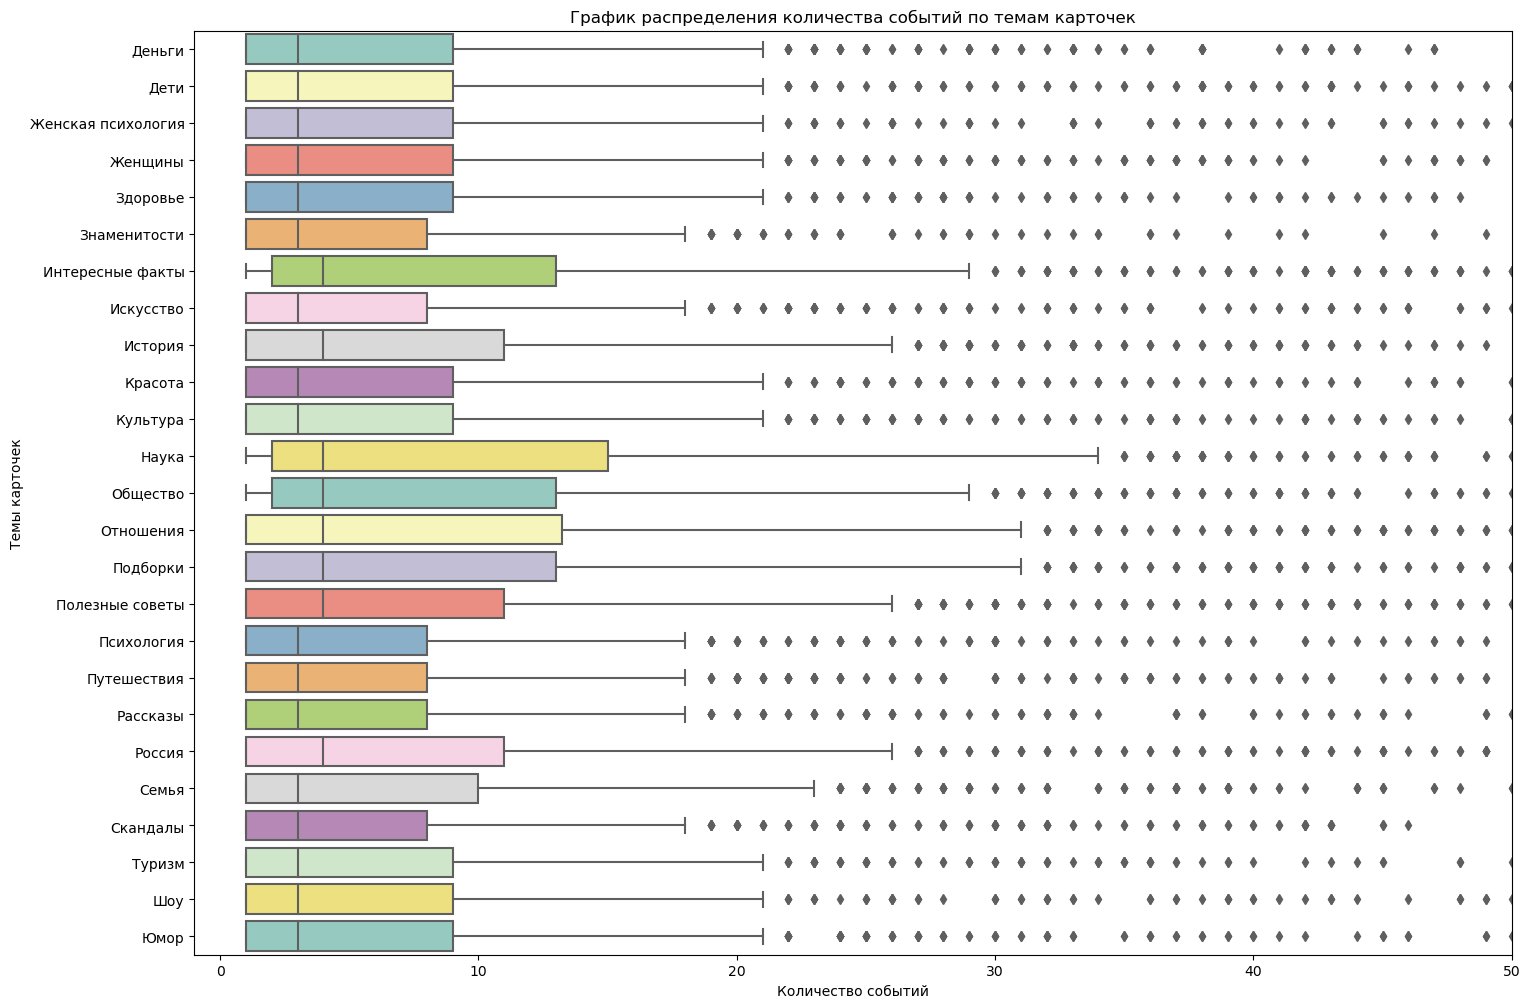

In [10]:
plt.figure(figsize=(17, 12))

ax = sns.boxplot(data=data, x='visits', y='item_topic', palette="Set3")
ax.set_xlim(-1,50)

plt.title('График распределения количества событий по темам карточек')
plt.xlabel('Количество событий')
plt.ylabel('Темы карточек')
plt.show()

#### Вывод:

- Можно считать данные корректными, поэтому оставим их без изменения
- Присутствуют выбросов, однако большая часть значений расположена от 1 до 20

### Экспорт данных в файл

***Выгрузим в данные в csv-файл:***

In [11]:
data.to_csv('dash_visits.csv', index = False, sep = '\t')

***Проверим таблицу:***

In [12]:
visits = pd.read_csv('dash_visits.csv', sep = '\t')
visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1
